Compare Stock Returns with Python
=============================================
1. Prepare the data
2. Calculate the mean returns and variance
3. Calculate Sharpe Ratio
4. Calculating Sortino Ratio

In [150]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [151]:
# Portfolio DIS, WBD, PARA, ROKU, NFLX, SPOT, CMCSA, AAPL, AMZN, MSFT, WMT, BA
tickers = 'DIS  PARA ROKU NFLX SPOT WBD  CMCSA AAPL AMZN MSFT WMT BA' # 
# Fetch closing price data from Yahoo Finance
data = yf.download(tickers, start='2020-01-01', end=None)['Close']
data.sort_index(inplace=True)
data.index = pd.to_datetime(data.index)
data

[*********************100%***********************]  12 of 12 completed


Ticker,AAPL,AMZN,BA,CMCSA,DIS,MSFT,NFLX,PARA,ROKU,SPOT,WBD,WMT
Date,,,,,,,,,,,,
2020-01-02,72.538521,94.900497,331.348572,39.001698,145.769913,152.791138,329.809998,36.085598,137.100006,151.619995,32.220001,36.508106
2020-01-03,71.833305,93.748497,330.791901,38.692230,144.097763,150.888596,325.899994,35.536884,137.509995,152.500000,32.029999,36.185810
2020-01-06,72.405678,95.143997,331.766083,38.399940,143.261719,151.278671,335.829987,36.059879,143.369995,156.720001,31.959999,36.112144
2020-01-07,72.065155,95.343002,335.285156,38.805882,143.310898,149.899292,330.750000,36.119888,138.190002,156.020004,32.070000,35.777576
2020-01-08,73.224426,94.598503,329.410095,39.203178,143.015808,152.286957,339.260010,35.896969,134.639999,158.779999,32.110001,35.654797
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,252.309998,220.210007,215.100006,31.610001,113.430000,510.149994,1203.949951,19.120001,98.209999,708.650024,19.820000,102.730003
2025-09-25,256.869995,218.149994,213.529999,31.620001,112.989998,507.029999,1208.239990,18.930000,98.010002,712.619995,19.780001,103.050003
2025-09-26,255.460007,219.779999,221.259995,31.719999,113.470001,511.459991,1210.609985,18.920000,99.599998,716.530029,19.510000,103.160004


Plotting data from 2020-01-02 to 2025-09-30


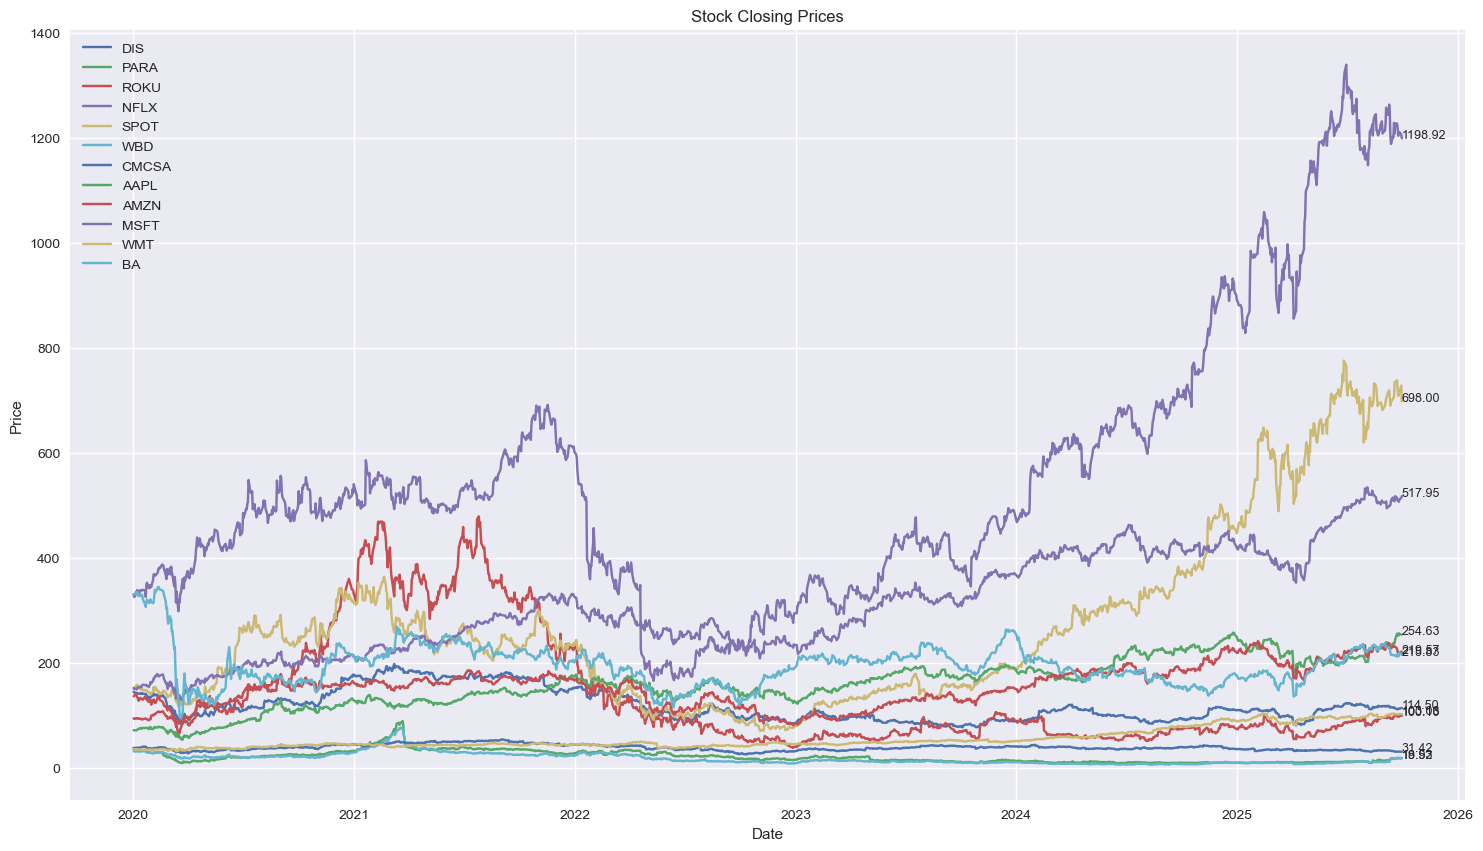

In [152]:
print(f'Plotting data from {data.index.min().date()} to {data.index.max().date()}')
# Plot the closing prices
plt.figure(figsize=(18, 10))
for ticker in tickers.split():
    plt.plot(data.index, data[ticker], label=ticker)
# Show the last printed value for each ticker
for ticker in tickers.split():
    plt.text(data.index[-1], data[ticker].iloc[-1], f'{data[ticker].iloc[-1]:.2f}', fontsize=9)
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [153]:
# Make a table comparing key statistics for each stock
stats_list = []
for ticker in tickers.split():
    # Fetch data from Yahoo Finance
    ticker_data = yf.Ticker(ticker)
    # Get historical market data
    information = ticker_data.info

    # Calculate estimated EPS next year based on forward P/E ratio
    regular_market_price = information.get('regularMarketPrice')
    forward_pe = information.get('forwardPE')
    estimated_forward_pes = (
        regular_market_price / forward_pe
        if regular_market_price is not None and forward_pe not in [None, 0]
        else None
    )

    def safe_round(val, digits=2):
        return np.round(val, digits) if val is not None else None

    price = {
        'Ticker': ticker,
        'Current Price': information.get('currentPrice'),
        'Shares Outstanding': information.get('sharesOutstanding'),
        'Current Volume': information.get('volume'),
        'Volume 3 Months Average': information.get('averageDailyVolume3Month'),
        'Market Cap': information.get('marketCap'),
        'Target Price': information.get('targetMeanPrice'),
        'Upside %': (
            np.round((information.get('targetMeanPrice') - information.get('currentPrice')) / 
            information.get('currentPrice') * 100, 2)
            if information.get('targetMeanPrice') is not None and information.get('currentPrice') not in [None, 0]
            else None
        ),
        '52 Week High': information.get('fiftyTwoWeekHigh'),
        '52 Week Low': information.get('fiftyTwoWeekLow'),
        '52 Week Change': safe_round(information.get('52WeekChange')),
        'YTD Return': safe_round(information.get('ytdReturn')),
        'Trailing P/E': safe_round(information.get('trailingPE')),
        'EPS TTM': safe_round(information.get('trailingEps')),
        'Estimated EPS Next Year': safe_round(estimated_forward_pes),
        'Estimated P/E Next Year': safe_round(information.get('forwardPE')),
        'PEG Ratio': safe_round(information.get('pegRatio')),
        'Price to Book (P/B)': safe_round(information.get('priceToBook')),
        'Price to Sales (P/S)': safe_round(information.get('priceToSalesTrailing12Months')),
        'EV/EBITDA': safe_round(information.get('enterpriseToEbitda')),
        'EV/Revenue': safe_round(information.get('enterpriseToRevenue')),
        'Profit Margin': safe_round(information.get('profitMargins')),
        'Dividend Yield': safe_round(information.get('dividendYield')),
        '50 Day Moving Average': safe_round(information.get('fiftyDayAverage')),
        '200 Day Moving Average': safe_round(information.get('twoHundredDayAverage')),
        'Beta': safe_round(information.get('beta'))
    }
    stats_list.append(price)

key_indicators_table = pd.DataFrame(stats_list).set_index('Ticker').transpose()
key_indicators_table

Ticker,DIS,PARA,ROKU,NFLX,SPOT,WBD,CMCSA,AAPL,AMZN,MSFT,WMT,BA
Current Price,114.5,11.04,100.13,1198.92,698.0,19.53,31.42,254.63,219.57,517.95,103.06,215.83
Shares Outstanding,1797933833,633521984,130251569,424926346,205777761,2475772282,3682762127,14840390000,10664912097,7433166379,7972851122,756157695
Current Volume,6430604,0,2848410,3797233,3844534,55845475,37480313,37643254,48147229,19474331,13861250,9269933
Volume 3 Months Average,8008436.0,NaN,3552519.0,3198184.0,1883953.0,69557536.0,22167530.0,55313092.0,42212950.0,19933884.0,15860246.0,7354325.0
Market Cap,205863419904,6994082816,14675597312,514420113408,147445940224,48351830016,117116788736,3791126265856,2343934361600,3850008526848,822479290368,167307460608
Target Price,132.78929,12.08824,104.11538,1355.066,750.0612,15.57,39.35714,243.19057,266.0,617.3055,112.82051,253.63635
Upside %,15.97,9.49,3.98,13.02,7.46,-20.28,25.26,-4.49,21.15,19.18,9.47,17.52
52 Week High,124.69,17.53,104.96,1341.15,785.0,20.24,45.31,260.1,242.52,555.45,106.11,242.69
52 Week Low,80.1,9.95,52.43,677.88,362.31,7.25,31.03,169.21,161.38,344.79,78.98,128.88
52 Week Change,0.22,0.22,0.35,0.69,0.86,1.45,-0.24,0.12,0.19,0.24,0.28,0.41


Data fetched on: 2025-10-01 19:36:59


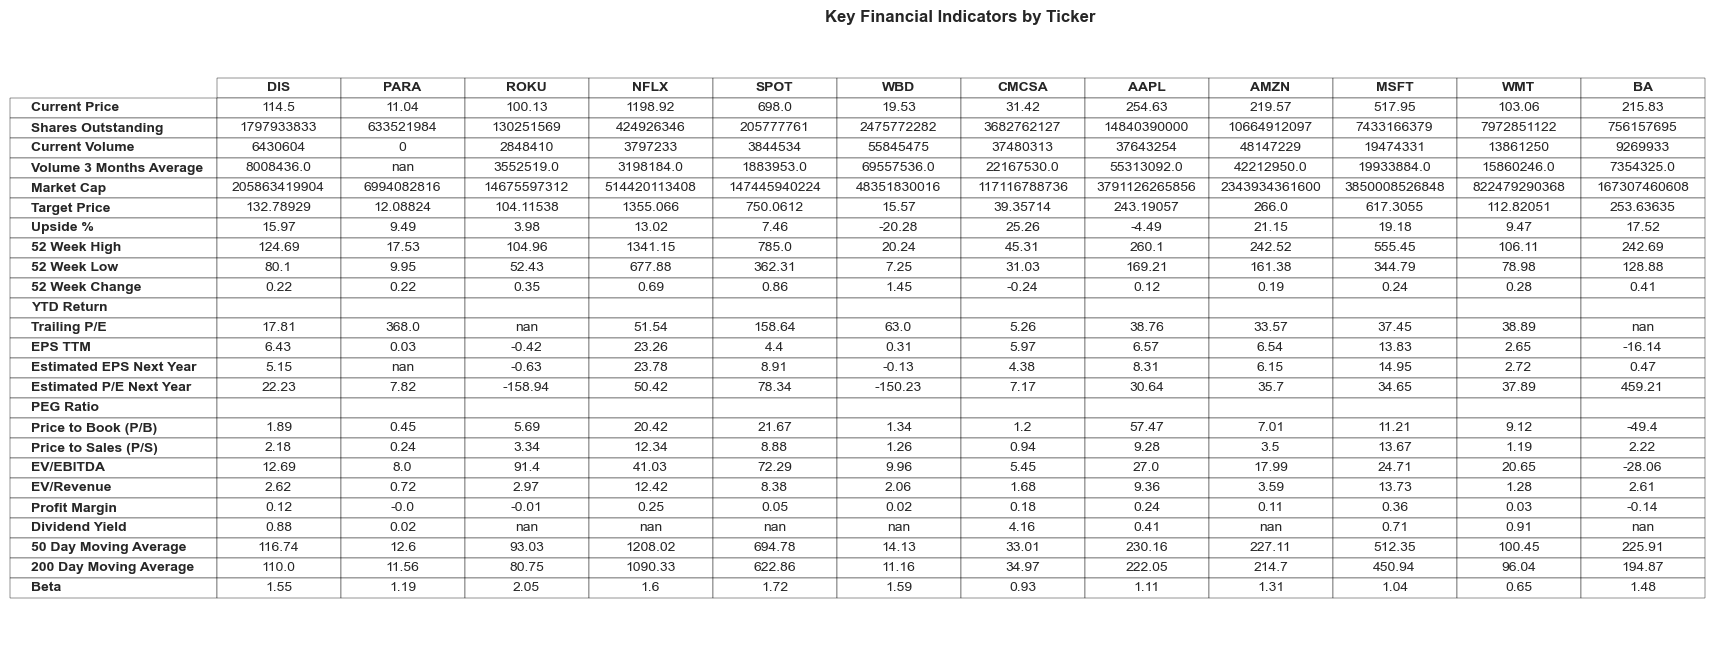

In [154]:
# Print the date update the date info Ticker info was fetched
print(f"Data fetched on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
fig, ax = plt.subplots(figsize=(16, 8))
ax.axis('off')
table = ax.table(cellText=key_indicators_table.values,
                 colLabels=key_indicators_table.columns,
                 rowLabels=key_indicators_table.index,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
# Auto-adjust column widths
#table.auto_set_column_width(col=list(range(len(key_indicators_table.columns))))
# Bold the header row
for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:
        cell.set_text_props(weight='bold')
plt.title('Key Financial Indicators by Ticker', fontsize=12, weight='bold')
plt.show()

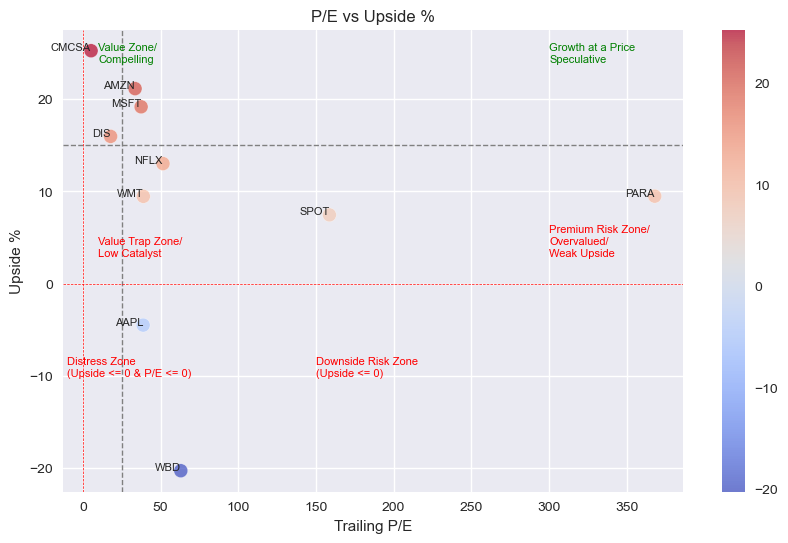

In [155]:
# Scatter plot P/E vs Upside % ratio
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    key_indicators_table.loc['Trailing P/E'],
    key_indicators_table.loc['Upside %'],
    c=pd.to_numeric(key_indicators_table.loc['Upside %'], errors='coerce'),
    cmap='coolwarm', alpha=0.7, edgecolors='w', s=100
)
plt.axhline(15, color='gray', linestyle='--', linewidth=1)
plt.axvline(25, color='gray', linestyle='--', linewidth=1)
plt.axhline(0, color='red', linestyle='--', linewidth=0.5)
plt.axvline(0, color='red', linestyle='--', linewidth=0.5)

plt.text(300, 24, 'Growth at a Price \nSpeculative', color='green', fontsize=8)
plt.text(10, 24, 'Value Zone/\nCompelling', color='green', fontsize=8)
plt.text(300, 3,'Premium Risk Zone/\nOvervalued/\nWeak Upside', color='red', fontsize=8)
plt.text(10, 3, 'Value Trap Zone/\nLow Catalyst', color='red', fontsize=8)
plt.text(150, -10, 'Downside Risk Zone \n(Upside <= 0)', color='red', fontsize=8)
plt.text(-10, -10, 'Distress Zone \n(Upside <= 0 & P/E <= 0)', color='red', fontsize=8)
plt.title('P/E vs Upside %')
plt.xlabel('Trailing P/E')
plt.ylabel('Upside %')
plt.colorbar(sc)
# Annotate each point with the ticker symbol
for ticker in key_indicators_table.columns:
    x = key_indicators_table.loc['Trailing P/E', ticker]
    y = key_indicators_table.loc['Upside %', ticker]
    if pd.notnull(x) and pd.notnull(y):
        plt.annotate(ticker, (x, y), fontsize=8, ha='right')
plt.grid(True)
plt.show()


- Trailing P/E: Price to Earnings ratio using the past 12 months of earnings. It is calculated as the current stock price divided by the earnings per share (EPS) over the last 12 months. A lower P/E ratio may indicate that a stock is undervalued, while a higher P/E ratio may suggest that it is overvalued. Generally, a P/E ratio below 15 is considered low, while a P/E ratio above 25 is considered high. Good for comparing companies within the same industry. Lower is generally better.

- Upside %: The percentage increase in the stock price from its current price to the target price set by analysts. It is calculated as ((Target Price - Current Price) / Current Price) * 100. A higher upside percentage indicates a greater potential for price appreciation. Generally, an upside percentage above 20% is considered attractive, while an upside percentage below 5% may indicate limited growth potential. Useful for assessing growth potential. Good for growth stocks. Higher is generally better.

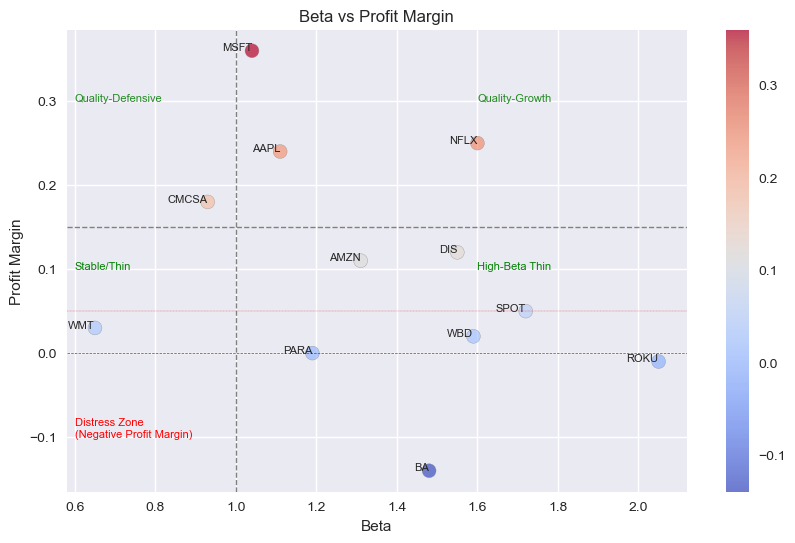

In [156]:
# Risk vs Profit Margin
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    key_indicators_table.loc['Beta'],
    key_indicators_table.loc['Profit Margin'],
    c=pd.to_numeric(key_indicators_table.loc['Profit Margin'], errors='coerce'),
    cmap='coolwarm', alpha=0.7, edgecolors='gray', s=100
)
plt.axhline(0, color='red', linestyle='--', linewidth=0.5)
plt.axhline(0.05, color='red', linestyle='--', linewidth=0.2)
plt.axhline(0.15, color='gray', linestyle='--', linewidth=1)
plt.axvline(1, color='gray', linestyle='--', linewidth=1)

plt.text(0.6, 0.3, 'Quality-Defensive', color='forestgreen', fontsize=8)
plt.text(1.6, 0.3, 'Quality-Growth', color='forestgreen', fontsize=8)

plt.text(0.6, 0.1, 'Stable/Thin', color='green', fontsize=8)
plt.text(1.6, 0.1,'High-Beta Thin', color='green', fontsize=8)

plt.text(0.6, -0.1, 'Distress Zone \n(Negative Profit Margin)', color='red', fontsize=8)

plt.title('Beta vs Profit Margin')
plt.xlabel('Beta')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.colorbar(sc)
# Annotate each point with the ticker symbol
for ticker in key_indicators_table.columns:
    x = key_indicators_table.loc['Beta', ticker]
    y = key_indicators_table.loc['Profit Margin', ticker]
    if pd.notnull(x) and pd.notnull(y):
        plt.annotate(ticker, (x, y), fontsize=8, ha='right')   
plt.grid(True)
plt.show()

Beta vs Profit Margin

- Beta: A measure of a stock's volatility in relation to the overall market. A beta of 1 indicates that the stock moves in line with the market, a beta less than 1 means it is less volatile, and a beta greater than 1 indicates higher volatility. Generally, a beta below 1 is considered low risk, while a beta above 1 is considered high risk. Useful for assessing market risk exposure. Good for risk-averse investors. Lower is generally better.

- Profit Margin: The percentage of revenue that remains as profit after all expenses are deducted. It is calculated as (Net Income / Revenue) * 100. A higher profit margin indicates better profitability and efficiency. Generally, a profit margin above 10% is considered good, while a profit margin below 5% may indicate poor profitability. Useful for assessing operational efficiency. Good for value stocks. Higher is generally better.

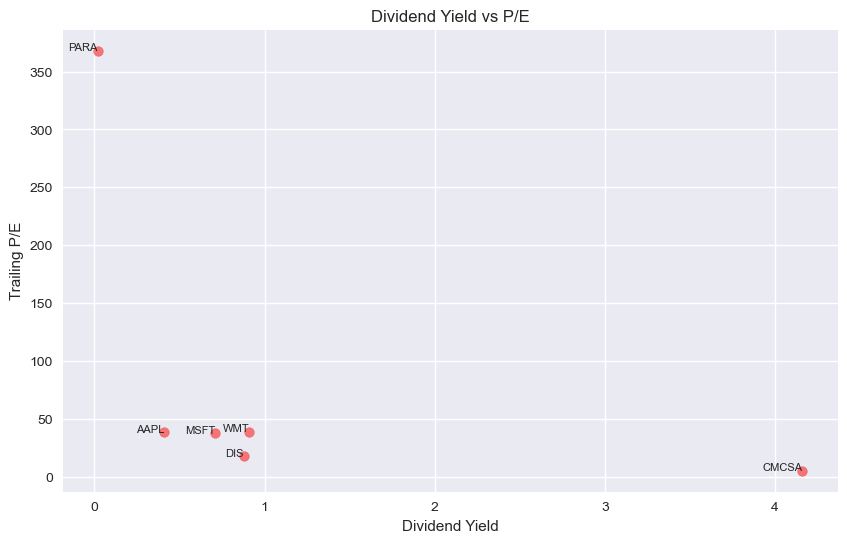

In [157]:
# Dividend Yield vs P/E
plt.figure(figsize=(10, 6))
plt.scatter(
    key_indicators_table.loc['Dividend Yield'],
    key_indicators_table.loc['Trailing P/E'],
    c='red', alpha=0.5
)
plt.title('Dividend Yield vs P/E')
plt.xlabel('Dividend Yield')
plt.ylabel('Trailing P/E')
plt.grid(True)
# Annotate each point with the ticker symbol
for ticker in key_indicators_table.columns:
    x = key_indicators_table.loc['Dividend Yield', ticker]
    y = key_indicators_table.loc['Trailing P/E', ticker]
    if pd.notnull(x) and pd.notnull(y):
        plt.annotate(ticker, (x, y), fontsize=8, ha='right')
plt.grid(True)
plt.show()

Dividend Yield vs P/E
- Dividend Yield: The annual dividend payment divided by the stock's current price, expressed as a percentage. It indicates how much cash flow you are getting for each dollar invested in an equity position. A higher dividend yield is often seen as a sign of a stable and mature company. Generally, a dividend yield above 3% is considered good, while a yield below 1% may indicate limited income potential. Useful for income-focused investors. Good for dividend stocks. Higher is generally better.

- P/E Ratio: See Trailing P/E above.

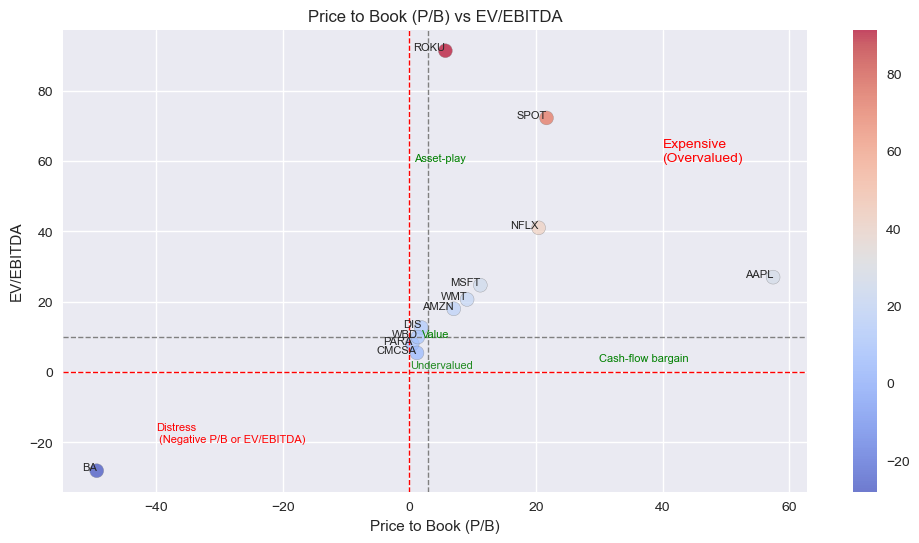

In [158]:
# Valuation vs Efficiency (Price to Book vs EV/EBITDA)
plt.figure(figsize=(12, 6))
cs = plt.scatter(
    key_indicators_table.loc['Price to Book (P/B)'],
    key_indicators_table.loc['EV/EBITDA'],
    c=pd.to_numeric(key_indicators_table.loc['EV/EBITDA'], errors='coerce'),
    cmap='coolwarm', alpha=0.7, edgecolors='gray', s=100
)
plt.title('Price to Book (P/B) vs EV/EBITDA')
plt.xlabel('Price to Book (P/B)')
plt.ylabel('EV/EBITDA')
plt.grid(True)
# Add Normal zone and Negative zone
plt.axhline(y=10, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=3, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.text(40, 60, 'Expensive\n(Overvalued)', color='red', fontsize=10)
plt.text(0.1, 1, 'Undervalued', color='forestgreen', fontsize=8)
plt.text(2, 10, 'Value', color='green', fontsize=8)
plt.text(0.8, 60, 'Asset-play', color='green', fontsize=8)
plt.text(30, 3, 'Cash-flow bargain', color='green', fontsize=8)
plt.text(-40, -20, 'Distress\n (Negative P/B or EV/EBITDA)', color='red', fontsize=8)
# Annotate each point with the ticker symbol
for ticker in key_indicators_table.columns:
    x = key_indicators_table.loc['Price to Book (P/B)', ticker]
    y = key_indicators_table.loc['EV/EBITDA', ticker]
    if pd.notnull(x) and pd.notnull(y):
        plt.annotate(ticker, (x, y), fontsize=8, ha='right')
plt.grid(True)
plt.colorbar(cs)
plt.show()


Price to Book (P/B) vs EV/EBITDA
- Price to Book (P/B): The ratio of a company's current stock price to its book value per share. It is calculated as Market Price per Share / Book Value per Share. A lower P/B ratio may indicate that a stock is undervalued, while a higher P/B ratio may suggest overvaluation. Generally, a P/B ratio below 1.5 is considered low, while a P/B ratio above 3 is considered high. Good for comparing companies within the same industry. Lower is generally better.

- EV/EBITDA: The ratio of a company's enterprise value (EV) to its earnings before interest, taxes, depreciation, and amortization (EBITDA). It is calculated as Enterprise Value / EBITDA. A lower EV/EBITDA ratio may indicate that a stock is undervalued, while a higher EV/EBITDA ratio may suggest overvaluation. Generally, an EV/EBITDA ratio below 10 is considered low, while an EV/EBITDA ratio above 15 is considered high. Good for comparing companies within the same industry. Lower is generally better.

- The best quadrant of the P/B vs EV/EBITDA chart is typically the lower-left quadrant, where both ratios are low. This indicates that the stock is undervalued on both a book value and earnings basis, making it an attractive investment opportunity. Generally, investors look for stocks in this quadrant as they may offer good value for their price at a lower risk. The right quadrants (upper-left and upper-right) indicate higher valuations, which may suggest overvaluation or higher risk.

- Negative values in Price to Book (P/B) and EV/EBITDA can occur in distressed companies or those with significant asset write-downs. These negative values can complicate valuation analysis, as traditional metrics may not apply. Investors should exercise caution and conduct thorough due diligence when evaluating such companies.

- Negative values in Price to Book (P/B) indicate that a company's liabilities exceed its assets, suggesting financial distress or insolvency. Negative EV/EBITDA values can occur when a company has negative earnings, often due to operational losses or high debt levels. Both negative values signal potential risks and warrant careful analysis before investment decisions.

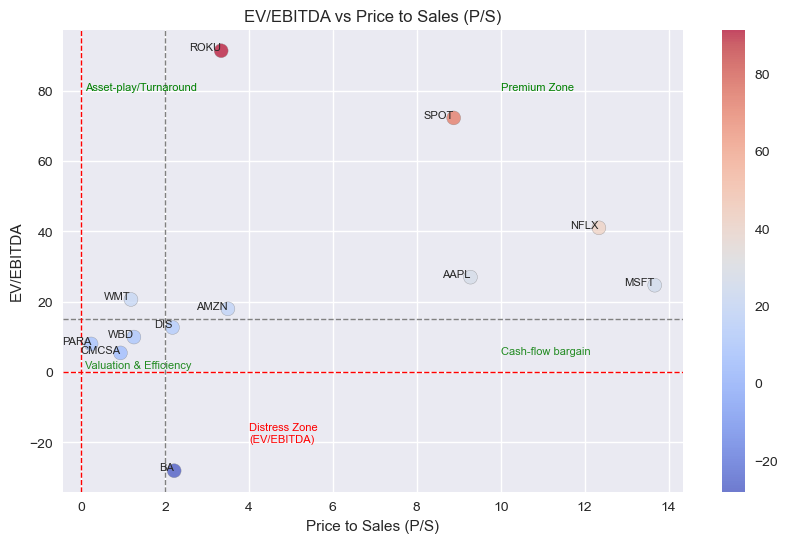

In [159]:
# Valuation vs Efficiency (Price to Sell vs EV/EBITDA)
plt.figure(figsize=(10, 6))
cs = plt.scatter(
    key_indicators_table.loc['Price to Sales (P/S)'],
    key_indicators_table.loc['EV/EBITDA'],
    c=pd.to_numeric(key_indicators_table.loc['EV/EBITDA'], errors='coerce'),
    cmap='coolwarm', alpha=0.7, edgecolors='gray', s=100
)
plt.title('EV/EBITDA vs Price to Sales (P/S)')
plt.xlabel('Price to Sales (P/S)')
plt.ylabel('EV/EBITDA')
plt.grid(True)
# Add Normal zone and Negative zone
plt.axhline(y=15, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=2, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)

plt.text(0.1, 1, 'Valuation & Efficiency', color='forestgreen', fontsize=8)
plt.text(10, 5, 'Cash-flow bargain', color='forestgreen', fontsize=8)

plt.text(0.1, 80, 'Asset-play/Turnaround', color='green', fontsize=8)
plt.text(10, 80,'Premium Zone', color='green', fontsize=8)

plt.text(4, -20, 'Distress Zone \n(EV/EBITDA)', color='red', fontsize=8)
# Annotate each point with the ticker symbol
for ticker in key_indicators_table.columns:
    x = key_indicators_table.loc['Price to Sales (P/S)', ticker]
    y = key_indicators_table.loc['EV/EBITDA', ticker]
    if pd.notnull(x) and pd.notnull(y):
        plt.annotate(ticker, (x, y), fontsize=8, ha='right')
plt.grid(True)
plt.colorbar(cs)
plt.show()

Valuation vs Efficiency (Price to Sales vs EV/EBITDA)
- EV/EBITDA: See above.
- Price to Sales (P/S): The ratio of a company's current stock price to its revenue per share. It is calculated as Market Price per Share / Revenue per Share. A lower P/S ratio may indicate that a stock is undervalued, while a higher P/S ratio may suggest overvaluation. Generally, a P/S ratio below 1 is considered low, while a P/S ratio above 3 is considered high. Good for comparing companies within the same industry. Lower is generally better.


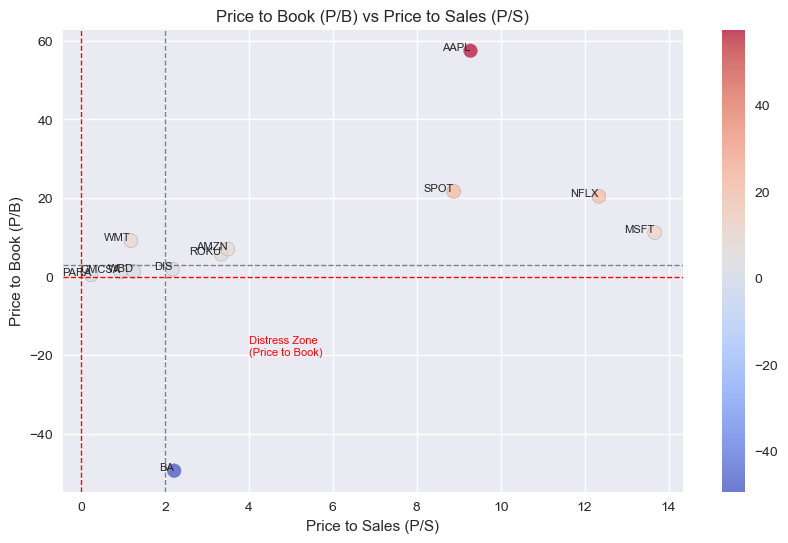

In [160]:
# Scatter plot Price to Book vs Price to Sales
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    key_indicators_table.loc['Price to Sales (P/S)'],
    key_indicators_table.loc['Price to Book (P/B)'],
    c=pd.to_numeric(key_indicators_table.loc['Price to Book (P/B)'], errors='coerce'),
    cmap='coolwarm', alpha=0.7, edgecolors='gray', s=100
)
plt.title('Price to Book (P/B) vs Price to Sales (P/S)')
plt.xlabel('Price to Sales (P/S)')
plt.ylabel('Price to Book (P/B)')
plt.grid(True)
# Add Normal zone and Negative zone
plt.axhline(y=3, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=2, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)

#plt.text(0.1, 1, 'Valuation & Efficiency', color='forestgreen', fontsize=8)
#plt.text(12, 10, 'Cash-flow bargain', color='forestgreen', fontsize=8)

#plt.text(0.1, 80, 'Asset-play/Turnaround', color='green', fontsize=8)
#plt.text(10, 80,'Premium Zone', color='green', fontsize=8)

plt.text(4, -20, 'Distress Zone \n(Price to Book)', color='red', fontsize=8)
# Annotate each point with the ticker symbol
for ticker in key_indicators_table.columns:
    x = key_indicators_table.loc['Price to Sales (P/S)', ticker]
    y = key_indicators_table.loc['Price to Book (P/B)', ticker]
    if pd.notnull(x) and pd.notnull(y):
        plt.annotate(ticker, (x, y), fontsize=8, ha='right')
plt.grid(True)
plt.colorbar(sc)
plt.show()

Price to Book (P/B) vs Price to Sales (P/S)
- Price to Book (P/B): See above.
- Price to Sales (P/S): See above.

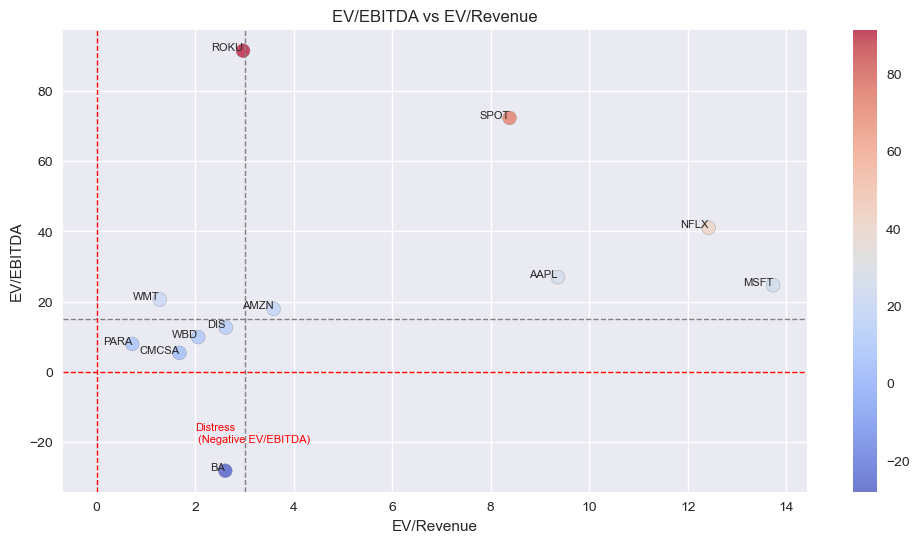

In [161]:
# Scatter plot valuation metrics EV/EBITDA vs EV/Revenue
plt.figure(figsize=(12, 6))
cs = plt.scatter(
    key_indicators_table.loc['EV/Revenue'],
    key_indicators_table.loc['EV/EBITDA'],
    c=pd.to_numeric(key_indicators_table.loc['EV/EBITDA'], errors='coerce'),
    cmap='coolwarm', alpha=0.7, edgecolors='gray', s=100
)
plt.title('EV/EBITDA vs EV/Revenue')
plt.xlabel('EV/Revenue')
plt.ylabel('EV/EBITDA')
plt.grid(True)
# Add Normal zone and Negative zone
plt.axhline(y=15, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=3, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
#plt.text(40, 60, 'Expensive\n(Overvalued)', color='red', fontsize=10)
#plt.text(0.1, 1, 'Undervalued', color='forestgreen', fontsize=8)
#plt.text(2, 10, 'Value', color='green', fontsize=8)
#plt.text(0.8, 60, 'Asset-play', color='green', fontsize=8)
#plt.text(30, 3, 'Cash-flow bargain', color='green', fontsize=8)
plt.text(2, -20, 'Distress\n (Negative EV/EBITDA)', color='red', fontsize=8)
# Annotate each point with the ticker symbol
for ticker in key_indicators_table.columns:
    x = key_indicators_table.loc['EV/Revenue', ticker]
    y = key_indicators_table.loc['EV/EBITDA', ticker]
    if pd.notnull(x) and pd.notnull(y):
        plt.annotate(ticker, (x, y), fontsize=8, ha='right')
plt.grid(True)
plt.colorbar(cs)
plt.show()


EV/EBITDA vs EV/Revenue:
- EV/EBITDA: See above.
- EV/Revenue: The ratio of a company's enterprise value (EV) to its total revenue. It is calculated as Enterprise Value / Revenue. A lower EV/Revenue ratio may indicate that a stock is undervalued, while a higher EV/Revenue ratio may suggest overvaluation. Generally, an EV/Revenue ratio below 2 is considered low, while an EV/Revenue ratio above 3 is considered high. Good for comparing companies within the same industry. Lower is generally better.


In [162]:
# Daily returns
returns = pd.DataFrame()
for ticker in data.columns:
    returns[ticker] = data[ticker].pct_change()
returns.dropna(inplace=True)
returns

,AAPL,AMZN,BA,CMCSA,DIS,MSFT,NFLX,PARA,ROKU,SPOT,WBD,WMT
Date,,,,,,,,,,,,
2020-01-03,-0.009722,-0.012139,-0.001680,-0.007935,-0.011471,-0.012452,-0.011855,-0.015206,0.002990,0.005804,-0.005897,-0.008828
2020-01-06,0.007968,0.014886,0.002945,-0.007554,-0.005802,0.002585,0.030469,0.014717,0.042615,0.027672,-0.002185,-0.002036
2020-01-07,-0.004703,0.002092,0.010607,0.010571,0.000343,-0.009118,-0.015127,0.001664,-0.036130,-0.004467,0.003442,-0.009265
2020-01-08,0.016086,-0.007809,-0.017523,0.010238,-0.002059,0.015928,0.025729,-0.006172,-0.025689,0.017690,0.001247,-0.003432
2020-01-09,0.021241,0.004799,0.014998,0.002644,-0.003920,0.012493,-0.010611,-0.025316,-0.006313,-0.006550,0.004360,0.010330
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,-0.008332,-0.002265,-0.005732,-0.000316,0.010512,0.001807,-0.011917,-0.030917,-0.007980,-0.014313,0.013292,0.002048
2025-09-25,0.018073,-0.009355,-0.007299,0.000316,-0.003879,-0.006116,0.003563,-0.009937,-0.002036,0.005602,-0.002018,0.003115
2025-09-26,-0.005489,0.007472,0.036201,0.003163,0.004248,0.008737,0.001962,-0.000528,0.016223,0.005487,-0.013650,0.001067


Calculating mean returns and variance
=============================

In [163]:
# Mean returns and variance of each stock from daily returns
comparison_table = pd.DataFrame()
mean_returns = returns.mean()
comparison_table['Mean Returns'] = mean_returns * 100
mean_variance = returns.var()
comparison_table['Variance'] = mean_variance * 100
comparison_table

,Mean Returns,Variance
AAPL,0.107685,0.041410
AMZN,0.083598,0.050973
BA,0.019301,0.097949
CMCSA,0.001131,0.032113
DIS,0.005656,0.044946
MSFT,0.102392,0.035553
NFLX,0.129439,0.077356
PARA,0.027115,0.143639
ROKU,0.074583,0.193698
SPOT,0.154554,0.097417


Mean returns and variance of each stock from daily returns
- Look for stocks with high mean returns and low variance
- Consider stocks with consistent performance and lower variance
- Avoid stocks with high variance as they may be more volatile

Calculate Sharpe Ratio
=============================
- Sharpe Ratio = (Mean Return - Risk-Free Rate) / Standard Deviation of Return
- Higher Sharpe Ratio indicates better risk-adjusted returns
- Use Sharpe Ratio to compare different stocks or portfolios
- Consider stocks with higher Sharpe Ratios for investment
- Risk-Free Rate can be approximated using government bond yields
- Use historical data to calculate mean returns and standard deviation
- Example: If Stock A has a Sharpe Ratio of 1.5 and Stock B has a Sharpe Ratio of 0.8, Stock A is preferred for its better risk-adjusted returns.


In [164]:
# Standard deviation (volatility) of each stock from daily returns
std_deviation = returns.std()
comparison_table['Standard Deviation'] = std_deviation * 100
comparison_table

,Mean Returns,Variance,Standard Deviation
AAPL,0.107685,0.041410,2.034949
AMZN,0.083598,0.050973,2.257729
BA,0.019301,0.097949,3.129687
CMCSA,0.001131,0.032113,1.792017
DIS,0.005656,0.044946,2.120047
MSFT,0.102392,0.035553,1.885546
NFLX,0.129439,0.077356,2.781289
PARA,0.027115,0.143639,3.789969
ROKU,0.074583,0.193698,4.401110
SPOT,0.154554,0.097417,3.121165


In [165]:
# For daily returns, we use 3-months T-bills as risk-free rate from finance FRED
import pandas_datareader.data as web
# Get the last year of 3-month T-bill rates
risk_free_rate = web.DataReader('DGS3MO', 'fred', start='2020-01-01', end='2025-09-29').dropna()
risk_free_rate = risk_free_rate / 100  # Convert to decimal
daily_risk_free_rate = (1+ risk_free_rate.mean().values[0])**(1/252) - 1  # Approximate daily risk-free rate
# Calculate Sharpe Ratio
sharpe_ratios = (mean_returns - daily_risk_free_rate) / std_deviation
sharpe_ratios = sharpe_ratios.sort_values(ascending=False)
comparison_table['Sharpe Ratio'] = sharpe_ratios
comparison_table

,Mean Returns,Variance,Standard Deviation,Sharpe Ratio
AAPL,0.107685,0.041410,2.034949,0.047511
AMZN,0.083598,0.050973,2.257729,0.032154
BA,0.019301,0.097949,3.129687,0.002651
CMCSA,0.001131,0.032113,1.792017,-0.005509
DIS,0.005656,0.044946,2.120047,-0.002522
MSFT,0.102392,0.035553,1.885546,0.048468
NFLX,0.129439,0.077356,2.781289,0.042583
PARA,0.027115,0.143639,3.789969,0.004251
ROKU,0.074583,0.193698,4.401110,0.014446
SPOT,0.154554,0.097417,3.121165,0.045993


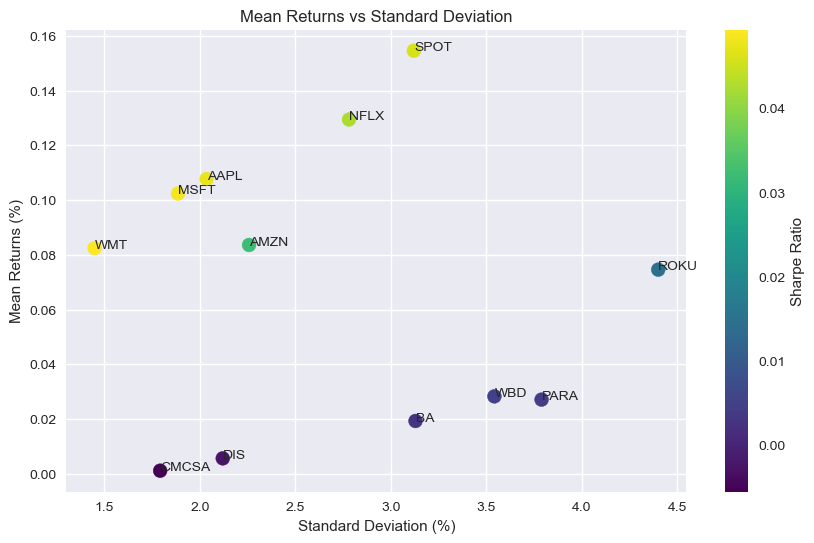

In [166]:
# Scatter plot of Mean Returns vs Standard Deviation with Sharpe Ratio as color
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    comparison_table['Standard Deviation'],
    comparison_table['Mean Returns'],
    c=sharpe_ratios[comparison_table.index],
    cmap='viridis',
    s=100
)
for ticker in comparison_table.index:
    plt.text(
        comparison_table.loc[ticker, 'Standard Deviation'],
        comparison_table.loc[ticker, 'Mean Returns'],
        ticker
    )
plt.title('Mean Returns vs Standard Deviation')
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean Returns (%)')
plt.colorbar(sc, label='Sharpe Ratio')
plt.grid(True)
plt.show()

Sharpe ratio is unitless and allows for comparison across different investments. It measures return per unit of risk. It is calculated as the ratio of the excess return of an investment to its volatility, providing a measure of risk-adjusted return. A higher Sharpe ratio indicates better risk-adjusted performance, making it a useful tool for comparing different investments or portfolios.

- < 0: Poor-risk-poor return, worse than risk-free asset
- 0 to 0.5: Sub-optimal-risk-suboptimal return 
- 0 to 1.0: Acceptable-risk-acceptable return
- greater than 1.0: Good-risk-good return
- greater than 2.0: Very good-risk-very good return
- greater than 3.0: Excellent-risk-excellent return

- Top-right quadrant: High return, high risk - Potentially good investments for risk-tolerant investors
- Top-left quadrant: High return, low risk - Ideal investments, but rare
- Bottom-right quadrant: Low return, high risk - Generally undesirable investments
- Bottom-left quadrant: Low return, low risk - Safe but unexciting investments

Calculating Sortino Ratio
=============================
- Sortino Ratio = (Mean Return - Risk-Free Rate) / Downside Deviation
- Focuses on downside risk, ignoring upside volatility
- More relevant for investors concerned about losses
- Higher Sortino Ratio indicates better risk-adjusted returns considering only negative volatility
- Use Sortino Ratio to compare stocks or portfolios with a focus on downside risk
- Example: If Stock A has a Sortino Ratio of 2.0 and Stock B has a Sortino Ratio of 1.0, Stock A is preferred for its better downside risk-adjusted returns.
- Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative asset returns, called downside deviation. It is calculated as the ratio of the excess return of an investment to its downside deviation, providing a measure of risk-adjusted return that focuses on downside risk. A higher Sortino ratio indicates better risk-adjusted performance, making it a useful tool for comparing different investments or portfolios with a focus on downside risk.


In [167]:
# Downside deviation for Sortino Ratio
target_return = 0  # Assuming target return is 0 for downside deviation calculation
downside_deviation = returns[returns < target_return].std()
comparison_table['Downside Deviation'] = downside_deviation * 100
comparison_table

,Mean Returns,Variance,Standard Deviation,Sharpe Ratio,Downside Deviation
AAPL,0.107685,0.041410,2.034949,0.047511,1.436836
AMZN,0.083598,0.050973,2.257729,0.032154,1.545182
BA,0.019301,0.097949,3.129687,0.002651,2.305474
CMCSA,0.001131,0.032113,1.792017,-0.005509,1.372374
DIS,0.005656,0.044946,2.120047,-0.002522,1.497859
MSFT,0.102392,0.035553,1.885546,0.048468,1.347080
NFLX,0.129439,0.077356,2.781289,0.042583,2.190861
PARA,0.027115,0.143639,3.789969,0.004251,2.746064
ROKU,0.074583,0.193698,4.401110,0.014446,2.923094
SPOT,0.154554,0.097417,3.121165,0.045993,2.133603


In [168]:
# Calculate Sortino Ratio
sortino_ratios = (mean_returns - daily_risk_free_rate) / downside_deviation
comparison_table['Sortino Ratio'] = sortino_ratios
comparison_table

,Mean Returns,Variance,Standard Deviation,Sharpe Ratio,Downside Deviation,Sortino Ratio
AAPL,0.107685,0.041410,2.034949,0.047511,1.436836,0.067288
AMZN,0.083598,0.050973,2.257729,0.032154,1.545182,0.046981
BA,0.019301,0.097949,3.129687,0.002651,2.305474,0.003599
CMCSA,0.001131,0.032113,1.792017,-0.005509,1.372374,-0.007193
DIS,0.005656,0.044946,2.120047,-0.002522,1.497859,-0.003570
MSFT,0.102392,0.035553,1.885546,0.048468,1.347080,0.067842
NFLX,0.129439,0.077356,2.781289,0.042583,2.190861,0.054059
PARA,0.027115,0.143639,3.789969,0.004251,2.746064,0.005867
ROKU,0.074583,0.193698,4.401110,0.014446,2.923094,0.021751
SPOT,0.154554,0.097417,3.121165,0.045993,2.133603,0.067281


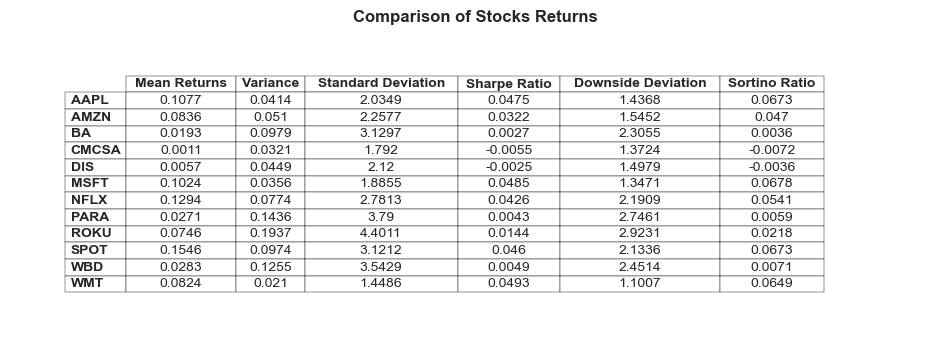

In [169]:
# Display the comparison table
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')
table = ax.table(cellText=np.round(comparison_table.values, 4),
                 colLabels=comparison_table.columns,
                 rowLabels=comparison_table.index,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
#table.scale(1.2, 1.2)
# Auto-adjust column widths
table.auto_set_column_width(col=list(range(len(comparison_table.columns))))
# Bold the header row
for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:
        cell.set_text_props(weight='bold')
plt.title('Comparison of Stocks Returns', fontsize=12, weight='bold')
plt.show()

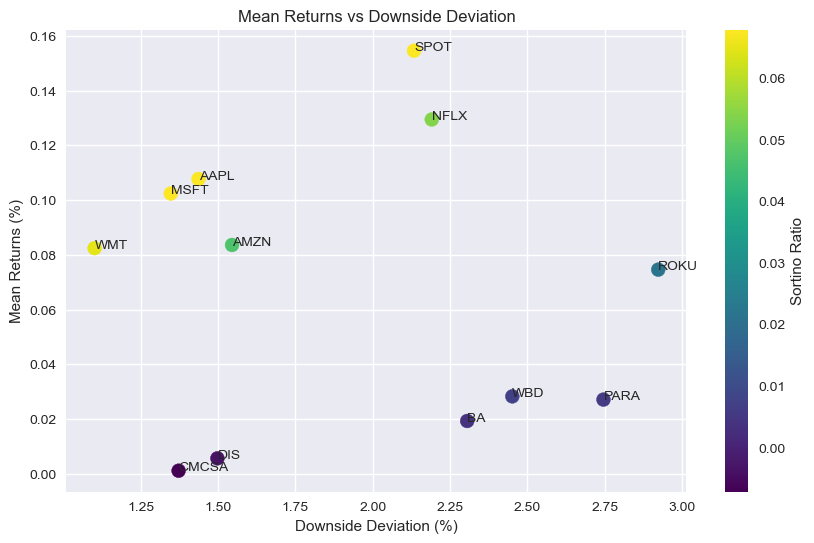

In [170]:
# Scatter plot of Mean Returns vs Downside Deviation with Sortino Ratio as color
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    comparison_table['Downside Deviation'],
    comparison_table['Mean Returns'],
    c=sortino_ratios[comparison_table.index],
    cmap='viridis',
    s=100
)
for ticker in comparison_table.index:
    plt.text(
        comparison_table.loc[ticker, 'Downside Deviation'],
        comparison_table.loc[ticker, 'Mean Returns'],
        ticker
    )
plt.title('Mean Returns vs Downside Deviation')
plt.xlabel('Downside Deviation (%)')
plt.ylabel('Mean Returns (%)')
plt.colorbar(sc, label='Sortino Ratio')
plt.grid(True)
plt.show()

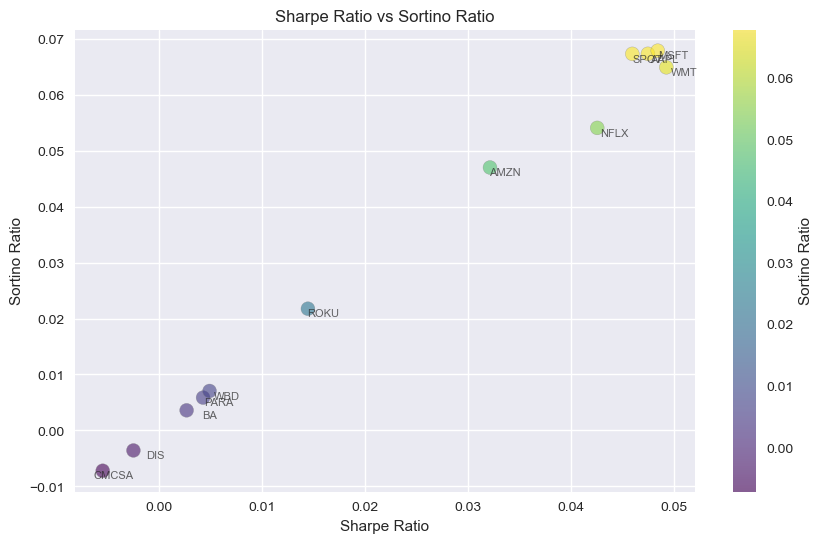

In [171]:
# Plot comparison sharpe vs sortino
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    comparison_table['Sharpe Ratio'],
    comparison_table['Sortino Ratio'],
    c=sortino_ratios[comparison_table.index],
    cmap='viridis', s=100, alpha=0.6, edgecolors='gray'
)
plt.title('Sharpe Ratio vs Sortino Ratio')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Sortino Ratio')
plt.colorbar(sc, label='Sortino Ratio')
plt.grid(True)
for ticker in comparison_table.index:
    plt.text(
        comparison_table.loc[ticker, 'Sharpe Ratio'] + 0.003,
        comparison_table.loc[ticker, 'Sortino Ratio'],
        ticker, fontsize=8, alpha=0.7, ha='right', va='top'
    )
plt.show()


Sharpe Ratio vs Sortino Ratio
- Sharpe Ratio considers total volatility, while Sortino Ratio focuses on downside risk.
- Sharpe Ratio is more commonly used and widely accepted in the finance industry.
- Sortino Ratio may be more relevant for risk-averse investors concerned about losses. 
- Higher values are better for both ratios.

Conclusion
=============================
- Use mean returns, variance, Sharpe Ratio, and Sortino Ratio to evaluate stocks
- Look for stocks with high mean returns, low variance, high Sharpe Ratio, and high Sortino Ratio
- Consider your risk tolerance and investment goals when making decisions